# Acquérir les données et créer le Dataframe  

## A) Scrapping: 

- Identification des criteres de recherches afin d'avoir plus d'informations. 
- Collecter les données necessaires permettant de prédire le prix final de chaque maison.

## B) Description des données:

- Seloger : 436 observations et 29 variables qualitatives 
- Belles demeures : 239 observations et 29 variables qualitatives


    - sl_prix : prix de vente du bien en euros.
    - sl_style: le type de logement
    - sl_prix :prix de logement en euros (target à predire)
    - sl_année :année de construction
    - sl_gardien :s'il ya un gardien  ou pas 
    - sl_taille : la surface 
    Etc.

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 10)

In [6]:
dataParisSL = pd.read_csv("data_paris_sl.csv")
dfParisBD = pd.read_csv("data_paris_bd.csv")
dfParisBD = dfParisBD.drop('Balcon', axis = 1)

In [7]:
dfParisBD= dfParisBD.rename(index=str, columns= {'bd_style': 'sl_style', 'bd_localisation': 'sl_localisation', 'bd_nb_chambre': 'sl_nb_chambre','bd_nb_piece':'sl_nb_piece','bd_paragraphe':'sl_paragraphe', 'bd_salle_d_eau': 'sl_salle_d_eau', 'bd_salle_de_bain':'sl_salle_de_bain', 'bd_toilette':'sl_toilette',
'bd_annee': 'sl_annee', 'bd_etage': 'sl_etage', 'bd_hauteur':'sl_hauteur', 'bd_ascenseur': 'sl_ascenseur', 'bd_vue': 'sl_vue',
       'bd_cave': 'sl_cave', 'bd_parking': 'sl_parking', 'bd_chemine': 'sl_chemine', 'bd_exposition': 'sl_exposition', 'bd_balcon': 'sl_balcon',
       'bd_terrasse':'sl_terrasse', 'bd_gardien':'sl_gardien', 'bd_travaux':'sl_travaux' , 'bd_neuf':'sl_neuf', 'bd_parquet':'sl_parquet',
       'bd_cuisine': 'sl_cuisine', 'bd_vis_a_vis':'sl_vis_a_vis', 'bd_jardin':'sl_jardin', 'bd_piscine':'sl_piscine', 'bd_taille':'sl_taille',
       'prix':'sl_prix'})

In [8]:
print(dfParisBD.shape)
print(dataParisSL.shape)

(239, 29)
(436, 29)


In [9]:
data = pd.concat([dataParisSL, dfParisBD])

## Dataset final (concaténation de seloger et Belles demeures)

Notre dataset final est constitué de 637 observations, de 15 variables continues et 14 variables qualitatives.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 0 to 238
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sl_style          637 non-null    object 
 1   sl_localisation   533 non-null    object 
 2   sl_nb_chambre     567 non-null    float64
 3   sl_taille         624 non-null    float64
 4   sl_prix           633 non-null    float64
 5   sl_paragraphe     564 non-null    object 
 6   sl_salle_d_eau    301 non-null    float64
 7   sl_salle_de_bain  437 non-null    float64
 8   sl_toilette       489 non-null    float64
 9   sl_annee          435 non-null    object 
 10  sl_etage          538 non-null    float64
 11  sl_hauteur        461 non-null    float64
 12  sl_ascenseur      505 non-null    object 
 13  sl_vue            223 non-null    object 
 14  sl_cave           442 non-null    object 
 15  sl_parking        50 non-null     float64
 16  sl_chemine        0 non-null      float64
 17  sl

# Visualiser les valuers nulles  



Dans les graphiques ci-dessous: nous remarquons que les valeurs non nulles sont supérieures aux valeurs nulles et que certaines  colonnes ne contiennent que des NAN. Supprimons des colonnes qui ne contiennent que des NAN. 


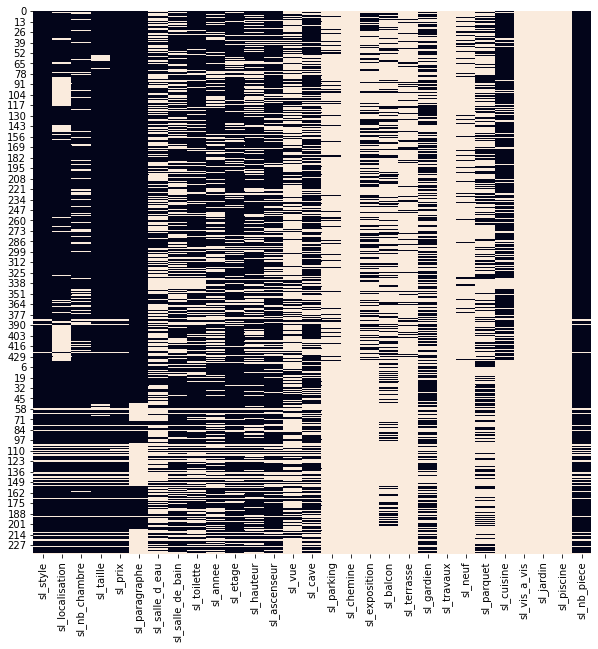

In [6]:
def viz_na(data):
    return sns.heatmap(data.isna(), cbar=False)

viz_na(data)

# on a pas beaucoup de valeur manquante, les features ont des relations en communs 

In [7]:
#missing data
def nan_description(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

nan_description(data)  


,Total,Percent
sl_jardin,675,1.000000
sl_vis_a_vis,675,1.000000
sl_travaux,675,1.000000
sl_chemine,675,1.000000
sl_piscine,674,0.998519
sl_parking,625,0.925926
sl_neuf,623,0.922963
sl_terrasse,614,0.909630
sl_exposition,502,0.743704
sl_balcon,497,0.736296


In [10]:
data = data.drop(["sl_chemine","sl_jardin", "sl_vis_a_vis","sl_travaux", "sl_piscine", "sl_paragraphe"], axis=1 )


#  Analyse des données  

##  Analyse des données Target

The average price of a house is close to 1 928 000€, with most of the values falling within the 690,000€ to 2 420 000 €.


In [95]:
data.sl_prix.describe()

count    6.330000e+02
mean     1.927855e+06
std      2.464604e+06
min      5.500000e+04
25%      6.900000e+05
50%      1.150000e+06
75%      2.420000e+06
max      3.900000e+07
Name: sl_prix, dtype: float64

C:\Users\utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


skew= 7.367181486092676


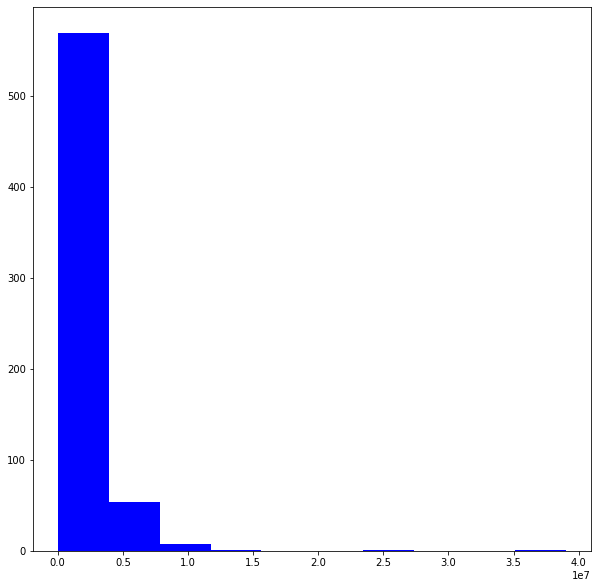

In [96]:
plt.hist(data.sl_prix, color = 'blue')
print ("skew=", data.sl_prix.skew())


Dans le graphique ci dessus, nous remarquons que la distribution est asymetrique vers la droite. Afin d'ameliorer la linéarité des données, appliquons "np.log () sur le target"(N.B : np.exp() permet d'inverser la transformation).

C:\Users\utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\utilisateur\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


skew= -0.17355813575248752


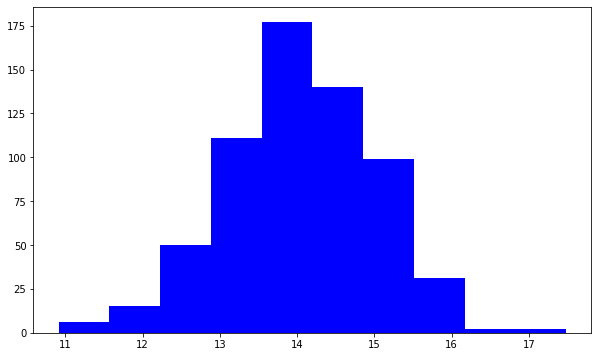

In [15]:
target = np.log(data.sl_prix)
plt.hist(target, color = 'blue')
print ("skew=", target.skew())

   ##  Relation between target and numeric Features

Les 2 premières features sont les plus positivement corrélées avec le prix, tandis que les 2 derniers  sont les plus négativement corrélées.

In [16]:
numeric_features_p = data.select_dtypes(include=[np.number]).corr()

print ("Correlation Paris", '\n', numeric_features_p['sl_prix'].sort_values(ascending=False)[:5], '\n')
print (numeric_features_p['sl_prix'].sort_values(ascending=False)[-5:])



Correlation Paris 
 sl_prix          1.000000
sl_taille        0.928970
sl_nb_piece      0.701882
sl_nb_chambre    0.657720
sl_toilette      0.434425
Name: sl_prix, dtype: float64 

sl_salle_d_eau    0.350353
sl_parking        0.094498
sl_terrasse       0.007312
sl_etage         -0.034272
sl_hauteur       -0.207661
Name: sl_prix, dtype: float64


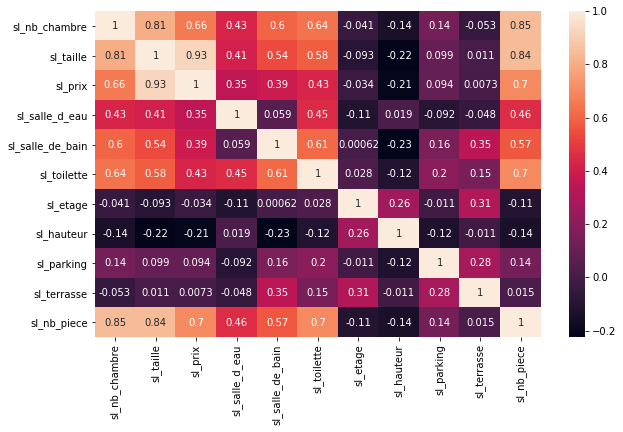

In [88]:
sns.heatmap(numeric_features_p, annot=True)

## Relation between target and no-numeric Features

**count** indique le nombre d'observations non nulles. 

**unique** : indique le nombre de valeurs uniques.

**top** : indique la valeur la plus courante.

**freq** : la fréquence de la valeur maximale indiquée

In [17]:
categoricals = data.select_dtypes(exclude= [np.number])
categoricals.describe()

,sl_style,sl_localisation,sl_annee,sl_ascenseur,sl_vue,sl_cave,sl_exposition,sl_balcon,sl_gardien,sl_neuf,sl_parquet,sl_cuisine
count,637,533,435,505,223,442,173,178,382,52,259,343
unique,4,8,85,1,2,20,8,26,1,1,1,8
top,Appartement,Paris 16ème,Année de construction 1900,Ascenseur,Vue,Cave,Orientation Sud,1 Balcon,Gardien,Refait à neuf,Parquet,Cuisine séparée
freq,613,206,100,505,133,405,45,73,382,52,259,141


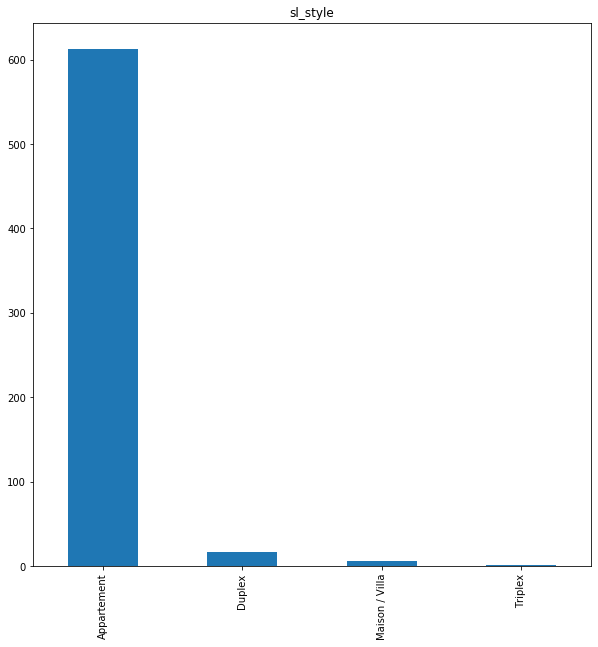

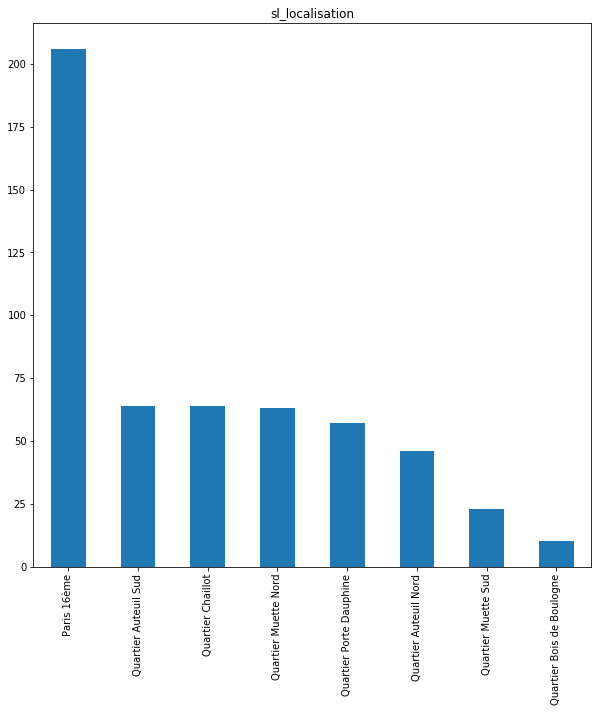

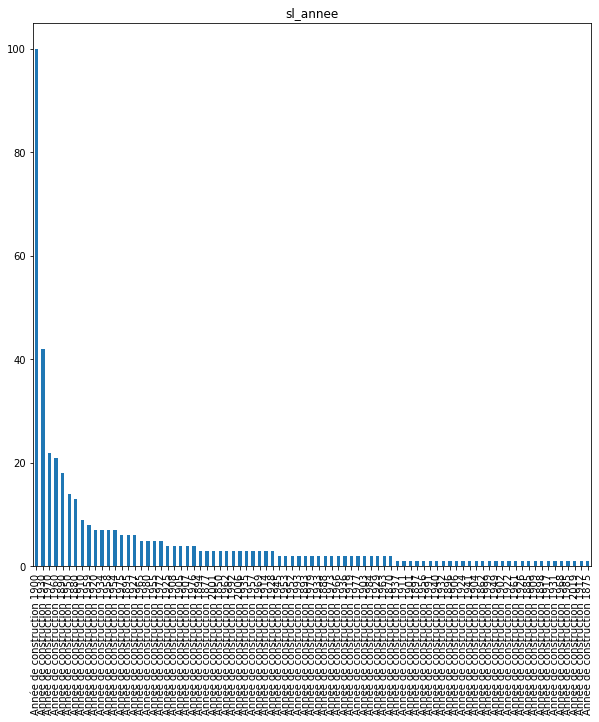

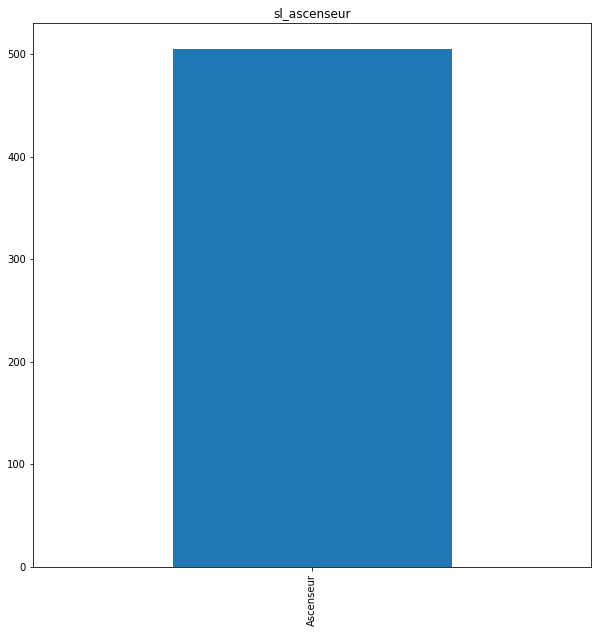

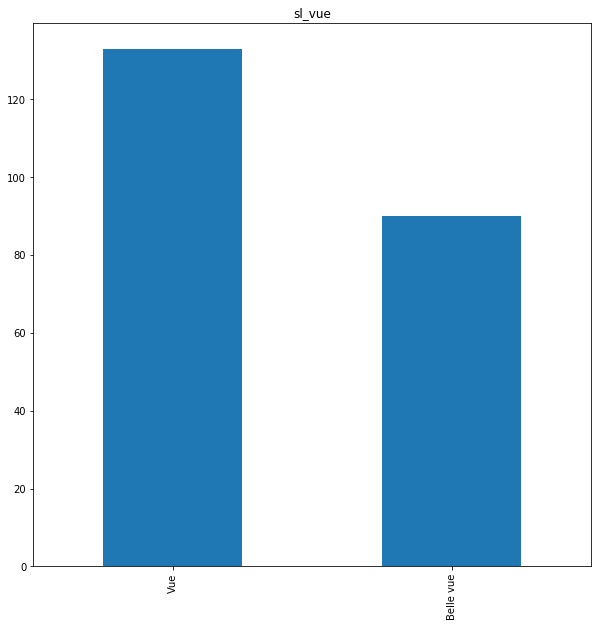

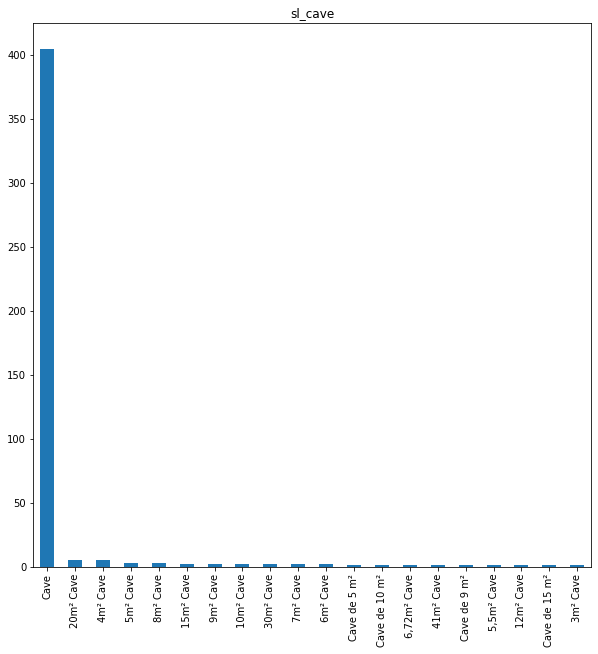

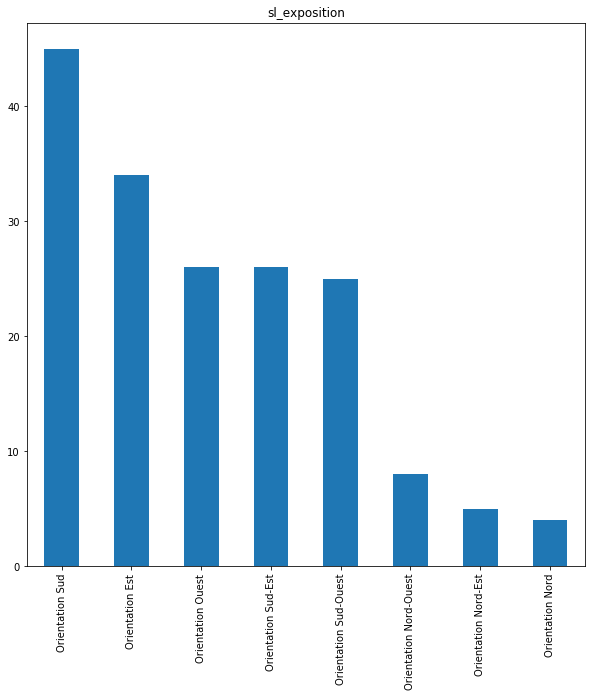

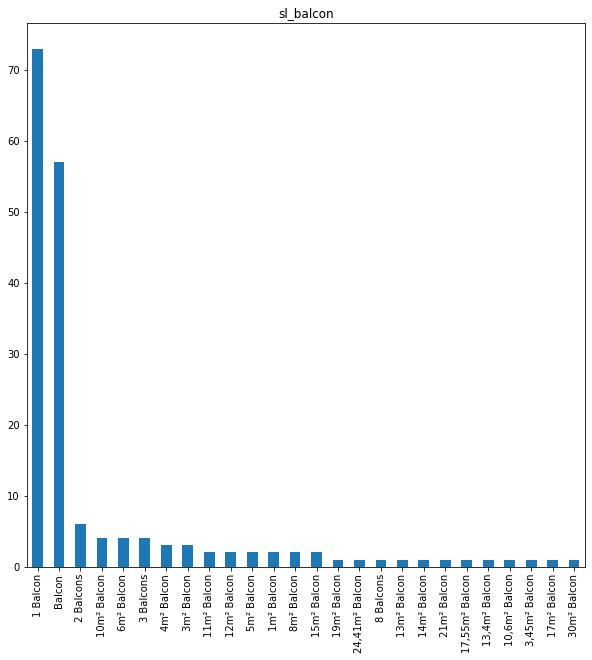

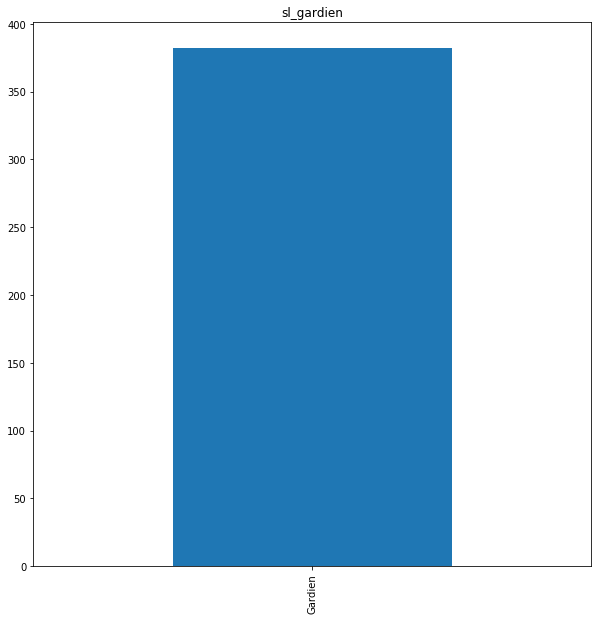

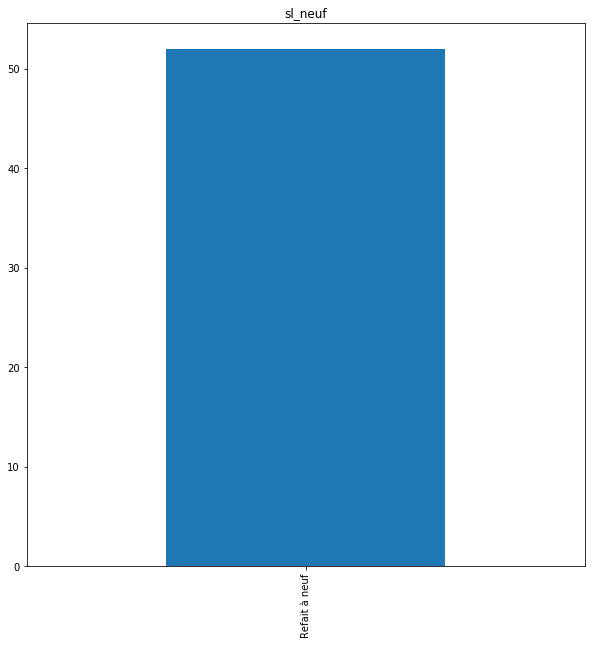

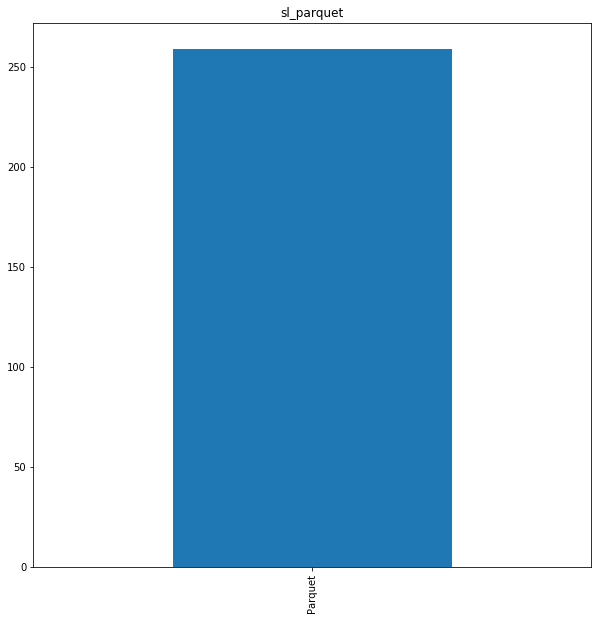

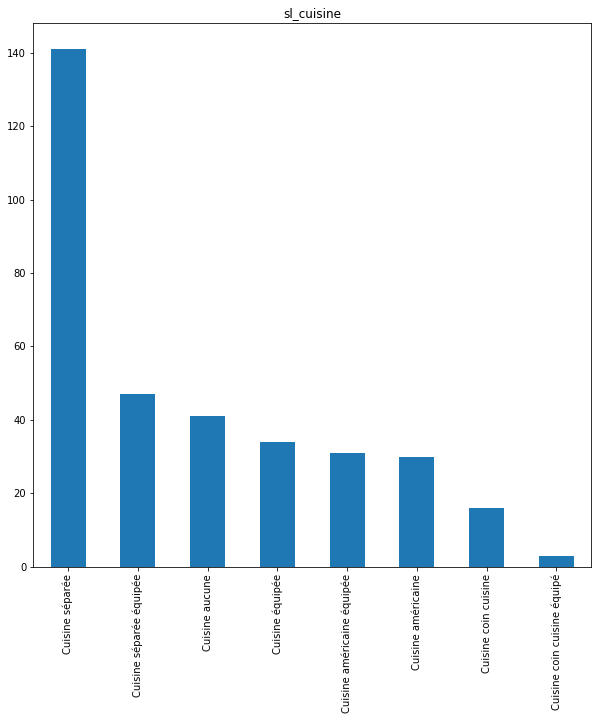

In [18]:
data_non_numeric = data.select_dtypes(exclude=[np.number])
data_non_numeric_cols = data_non_numeric.columns.values

for col in data_non_numeric_cols:
    data[col].value_counts().plot(kind='bar',figsize=(10,10),title=col) 
    plt.show()

Notons que le prix d'achat médiane d'un logement de type Triplex est  plus élevé que les autres. 

                  sl_prix
sl_style                 
Appartement     1125000.0
Duplex          2100000.0
Maison / Villa  4850000.0
Triplex         7000000.0


Text(0.5, 1.0, 'Prix médiane type logement')

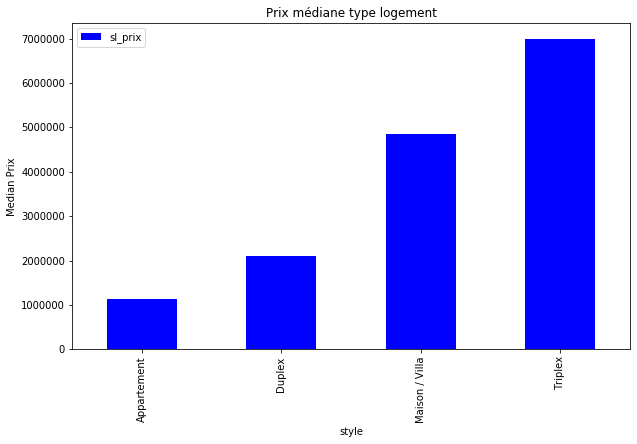

In [21]:
cuisine_pivot = data.pivot_table(index='sl_style', values = 'sl_prix', aggfunc = np.median)
print(cuisine_pivot)

cuisine_pivot.plot(kind='bar', color='blue')
plt.xlabel('style')
plt.ylabel('Median Prix')
plt.title('Prix médiane type logement')

Notons que le prix d'achat médiane de la Cuisine séparée équipée est nettement plus élevé que les autres. 

                               sl_prix
sl_cuisine                            
Cuisine américaine            792000.0
Cuisine américaine équipée    850000.0
Cuisine aucune                625000.0
Cuisine coin cuisine          311000.0
Cuisine coin cuisine équipé   114000.0
Cuisine séparée               880000.0
Cuisine séparée équipée      1190000.0
Cuisine équipée               650000.0


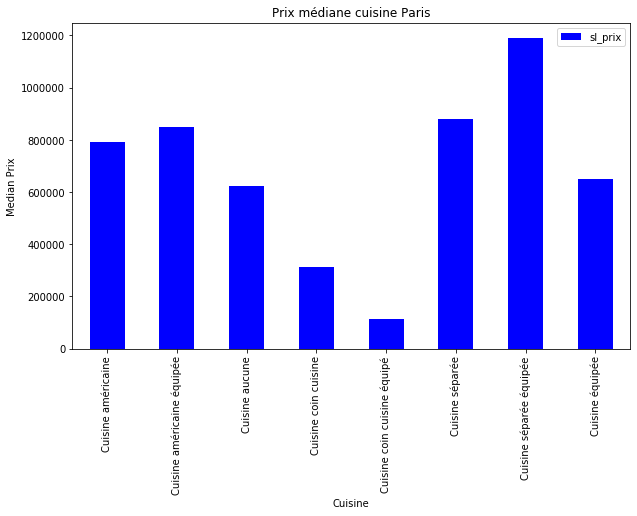

In [22]:
cuisine_pivot = data.pivot_table(index='sl_cuisine', values = 'sl_prix', aggfunc = np.median)
print(cuisine_pivot)

cuisine_pivot.plot(kind='bar', color='blue')
plt.xlabel('Cuisine')
plt.ylabel('Median Prix')
plt.title('Prix médiane cuisine Paris')
plt.show()

                             sl_prix
sl_localisation                     
Paris 16ème                2275000.0
Quartier Auteuil Nord       649000.0
Quartier Auteuil Sud        720000.0
Quartier Bois de Boulogne   805000.0
Quartier Chaillot          1090000.0
Quartier Muette Nord        749000.0
Quartier Muette Sud         805000.0
Quartier Porte Dauphine    1850000.0


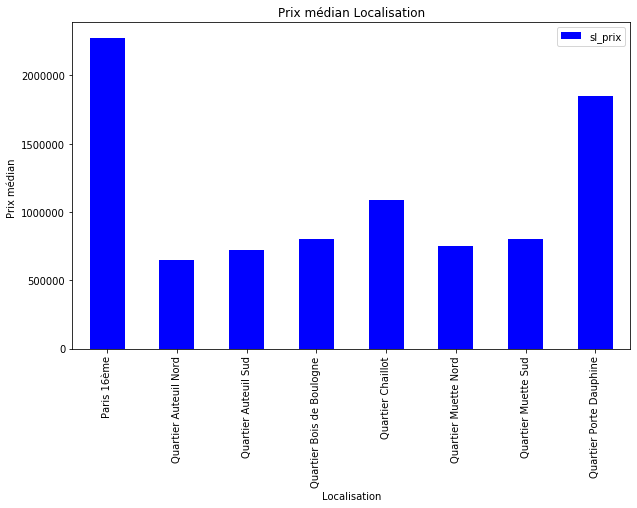

None


In [23]:
localisation = data.pivot_table(index='sl_localisation', values = 'sl_prix', aggfunc = np.median)
print(localisation )
localisation.plot(kind='bar', color='blue')
plt.xlabel('Localisation')
plt.ylabel('Prix médian ')
plt.title('Prix médian Localisation')
print(plt.show())


                          sl_prix
sl_exposition                    
Orientation Est          880000.0
Orientation Nord        1145500.0
Orientation Nord-Est     475000.0
Orientation Nord-Ouest   911300.0
Orientation Ouest        848500.0
Orientation Sud          898000.0
Orientation Sud-Est      601500.0
Orientation Sud-Ouest    780000.0


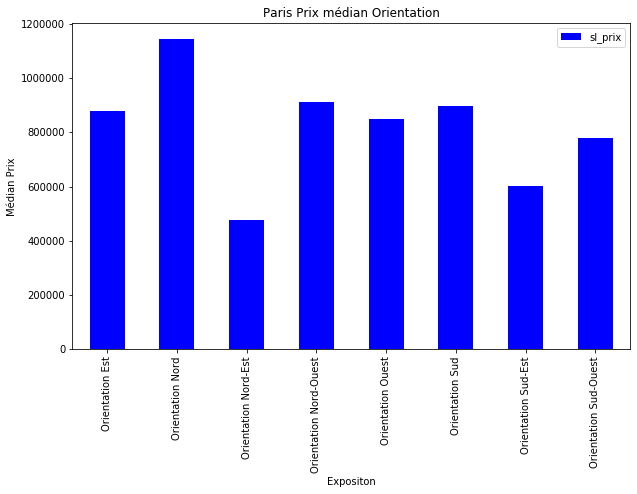

None


In [13]:
exposition_pivot = data.pivot_table(index='sl_exposition', values = 'sl_prix', aggfunc = np.median)
print(exposition_pivot)

exposition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Expositon')
plt.ylabel('Médian Prix')
plt.title('Paris Prix médian Orientation')
plt.legend()
print(plt.show())

# Encoding Categorical Features

In [11]:
def encode(x):
    return 1 if x =='Triplex' else 0

data['sl_style_enc'] = data.sl_style.apply(encode)

In [12]:
def encode(x):
    return 1 if x =='Paris 16ème ' else 0

data['sl_localisation_enc'] = data.sl_localisation.apply(encode)


In [13]:
def encode(x):
    return 1 if x =='Cuisine séparée équipée' else 0

data['sl_cuisine_enc'] = data.sl_cuisine.apply(encode)


In [14]:
data.sl_exposition.value_counts()

Orientation Sud           45
Orientation Est           34
Orientation Ouest         26
Orientation Sud-Est       26
Orientation Sud-Ouest     25
Orientation Nord-Ouest     8
Orientation Nord-Est       5
Orientation Nord           4
Name: sl_exposition, dtype: int64

In [15]:
def encode(x):
    return 1 if x =='Orientation Nord-Ouest' else 0

data['sl_exposition_enc'] = data.sl_exposition.apply(encode)


In [16]:
def encode(x):
    return 1 if x =='Belle vue' else 0

data['sl_vue_enc'] = data.sl_vue.apply(encode)



In [17]:
def encode(x):
    return 1 if x =='Ascenseur' else 0

data['sl_ascenseur_enc'] = data.sl_ascenseur.apply(encode)


In [18]:
data.sl_neuf.value_counts()

Refait à neuf    52
Name: sl_neuf, dtype: int64

In [19]:
def encode(x):
    return 1 if x =='Refait à neuf' else 0

data['sl_neuf_enc'] = data.sl_neuf.apply(encode)


In [20]:
def encode(x):
    return 1 if x =='Cave' else 0

data['sl_cave_enc'] = data.sl_cave.apply(encode)


In [21]:
#data.sl_annee.value_counts()

In [22]:
def encode(x):
    return 1 if x == 'Année de construction 1900' else 0

data['sl_annee_enc'] = data.sl_annee.apply(encode)


In [23]:
#data.sl_balcon.value_counts()

In [24]:
def encode(x):
    return 1 if x =='1 Balcon' else 0

data['sl_balcon_enc'] = data.sl_balcon.apply(encode)

In [25]:
def encode(x):
    return 1 if x =='Parquet' else 0

data['sl_parquet_enc'] = data.sl_parquet.apply(encode)


In [26]:
def encode(x):
    return 1 if x =='Gardien' else 0

data['sl_gardien_enc'] = data.sl_gardien.apply(encode)


# Missing data : Interpolation 

Permet de rmeplir les valeurs manquantes par une valeur moyenne



In [27]:

data_paris= data.select_dtypes(include=[np.number]).interpolate().dropna()
data_paris

,sl_nb_chambre,sl_taille,sl_prix,sl_salle_d_eau,sl_salle_de_bain,sl_toilette,sl_etage,sl_hauteur,sl_parking,sl_terrasse,...,sl_cuisine_enc,sl_exposition_enc,sl_vue_enc,sl_ascenseur_enc,sl_neuf_enc,sl_cave_enc,sl_annee_enc,sl_balcon_enc,sl_parquet_enc,sl_gardien_enc
8,3.0,217.0,1995000.0,1.5,3.0,1.0,4.0,6.0,2.000000,3.000000,...,0,0,0,1,0,1,0,0,0,1
9,3.0,156.0,2950000.0,1.0,1.0,1.0,2.0,6.5,1.933333,2.333333,...,0,0,0,1,1,0,0,1,0,0
10,1.0,55.0,595000.0,1.0,1.0,1.0,4.0,7.0,1.866667,1.666667,...,1,0,0,1,0,0,0,0,1,1
11,1.0,25.0,370000.0,1.0,1.0,1.0,4.0,7.0,1.800000,1.000000,...,0,0,0,1,0,0,0,0,1,0
12,1.0,44.0,455000.0,1.0,1.0,1.0,5.0,7.0,1.733333,1.000000,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,6.0,293.0,4672500.0,2.0,2.0,1.0,5.0,7.0,2.000000,1.000000,...,0,0,0,0,0,0,0,0,1,0
235,3.0,74.0,915000.0,2.0,1.0,1.0,5.0,5.0,2.000000,1.000000,...,0,0,1,1,0,0,1,0,1,1
236,6.0,425.0,6825000.0,2.0,3.0,2.0,1.0,6.0,2.000000,1.000000,...,0,0,0,1,0,1,1,0,0,1
237,1.0,45.0,686000.0,2.0,3.0,2.0,3.0,6.0,2.000000,1.000000,...,0,0,0,1,0,1,0,0,1,1


# Modèle Linéaire

In [28]:
from sklearn.model_selection import train_test_split

X =  data_paris.drop(['sl_prix'], axis=1)
y = np.log(data_paris.sl_prix)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Score: R2

In [49]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8228661079301289
0.8123950355456843


In [30]:
y_pred = model.predict(X_test)

## RMSE 

In [48]:
from sklearn.metrics import mean_squared_error
def RMSE (y_test, y_pred):
    return mean_squared_error(y_test, y_pred)
# la distance entre nos valeurs prévues et les valeurs réelles.
RMSE(y_test, y_pred)

0.16621438030474475

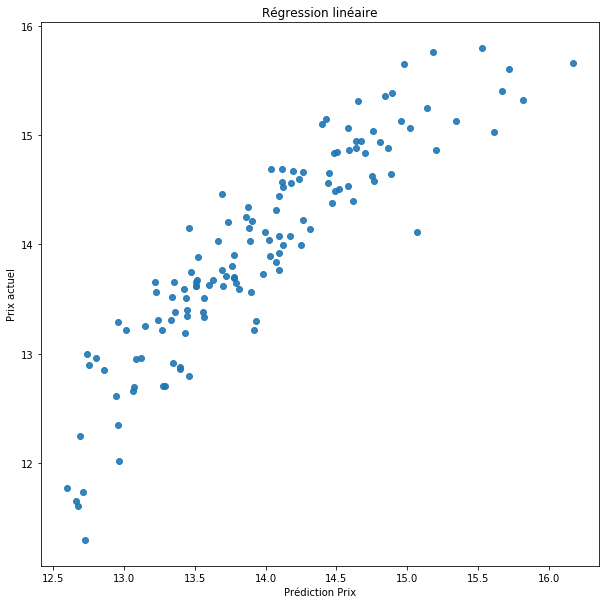

In [32]:
#prediction_f = np.exp(y_pred)
#y_test = np.exp(y_test)
plt.scatter(y_pred, y_test, alpha=0.9)
plt.xlabel('Prédiction Prix')
plt.ylabel('Prix actuel')
plt.title('Régression linéaire')
plt.show()


# Cross-validation et gridsearch


In [33]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import ensemble



models = {'LR': LinearRegression(),
          'Lasso': Lasso(),
          'Ridge': Ridge(),
          'Elastic_net' :  ElasticNet()}

 

 

params= {
    'LR': {'fit_intercept': [True, False]},
    'Lasso' : {'alpha': [0.001,0.01,0.02,0.025,0.05,0.25,0.5,1,5,10]},
    'Ridge' : {'alpha': [100,50,25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01,0.001]},
    'Elastic_net': {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                     'l1_ratio' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] }     
}

 

    
 

def gridCV_fit(X_train,y_train):
    Evaluation_CV_result={}
    
    for model_name in models.keys():
        print(model_name)
        grid=GridSearchCV(estimator=models[model_name], param_grid=params[model_name], cv=5, n_jobs=4,verbose=10,return_train_score=True)
        grid.fit(X_train,y_train)  
        print("best estimator are: {}".format(grid.best_params_))
        print("best parameters are: {}".format(grid.best_estimator_))
        print("best scores are: {}".format(grid.best_score_))
        Evaluation_CV_result[model_name]=[grid.best_score_]
    df_CV_result=pd.DataFrame(Evaluation_CV_result, index =['CV_score']) 
    return  df_CV_result

In [34]:
gridCV_fit(X_train,y_train)

LR
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    3.3s remaining:    1.3s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0328s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0800s.) Setting batch_size=4.


best estimator are: {'fit_intercept': True}
best parameters are: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
best scores are: 0.7388278061618687
Lasso
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0920s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  43 out of  50 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0326s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0326s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0702s.) Setting batch_size=8.


best estimator are: {'alpha': 0.001}
best parameters are: Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
best scores are: 0.7389586661117432
Ridge
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1251s.) Setting batch_size=16.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0700s.) Setting batch_size=2.


best estimator are: {'alpha': 2}
best parameters are: Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
best scores are: 0.7406211480853943
Elastic_net
Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0529s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1117s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 288 tasks      | elapsed:    2.0s


best estimator are: {'alpha': 0.01, 'l1_ratio': 0}
best parameters are: ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
best scores are: 0.7405786321697068


[Parallel(n_jobs=4)]: Done 362 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 385 out of 385 | elapsed:    2.5s finished
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.72472965274063, tolerance: 0.0513720876233662
  positive)


,LR,Lasso,Ridge,Elastic_net
CV_score,0.738828,0.738959,0.740621,0.740579


## Prediction Prix avec Ridge

In [35]:
my_best_model= Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001).fit(X_train,y_train)
# Use the model to make predictions
predicted_prices = my_best_model.predict(X_test)
print(my_best_model.score(X_test, y_test))
print(my_best_model.score(X_train, y_train))

0.8082573814717401
0.8148151921005561


## RMSE

In [47]:
mean_squared_error(y_test, predicted_prices )

0.16988026201430634

On remarque que le RMSE est proche de 0.

In [37]:
final_predictions = np.exp(predicted_prices)


In [38]:
print ("Original predictions are: \n", predicted_prices[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [14.05382538 13.01051402 14.11166496 12.90632424 14.68851355] 

Final predictions are: 
 [1269108.6726251   447089.47391992 1344677.76291693  402851.88325279
 2394089.50322592]


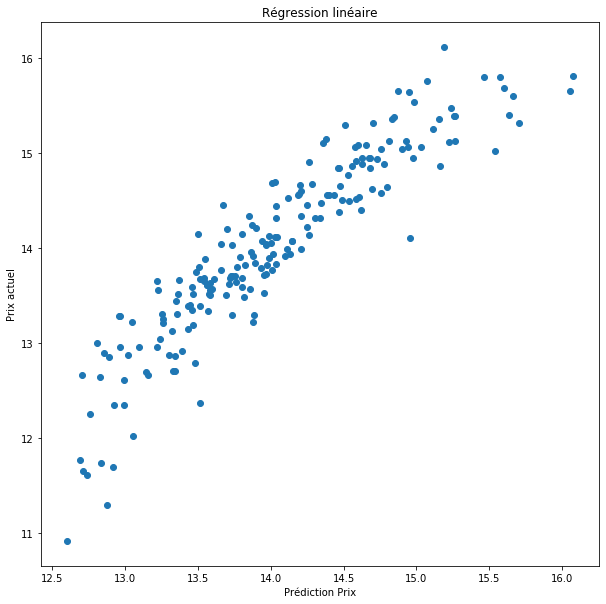

In [40]:
plt.scatter(predicted_prices, y_test, alpha=1)
plt.xlabel('Prédiction Prix')
plt.ylabel('Prix actuel')
plt.title('Régression linéaire')
plt.show()


# GradientBoostingRegressor

In [45]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

clf.fit(X_train, y_train)

print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))


0.9301751593717263
0.9998778986595768


In [40]:

lr_cross_val = cross_val_score(clf, X_train,y_train, cv=5)
print(f'CROSS SCORE Linear Regression : {np.mean(lr_cross_val)}')



CROSS SCORE Linear Regression : 0.9278639763228249


## RMSE GradientBoostingRegressor

In [42]:
y_predic = clf.predict(X_test)
mean_squared_error(y_test, y_predic)

0.06332351257217499

Le Rmse de GradientBoostingRegressor est le plus faible. On en déduit que la distance entre les valuers réelles et les valeurs prévues est quasi nulle.

## Prediction Prices 

In [43]:
predict_prices = clf.predict(X_test)
predict_final = np.exp(predict_prices)
y_test = np.exp(y_test)

In [47]:
print ("Original predictions are: \n",predict_final[:5], "\n")
print ("Final predictions are: \n", y_test[:5], "\n")

Original predictions are: 
 [1077899.16343673  118477.82140776 1260305.79762877  382556.25662738
 2959488.04766574] 

Final predictions are: 
 232    1020000.0
166     165000.0
206    1195000.0
243     424000.0
207    3090000.0
Name: sl_prix, dtype: float64 



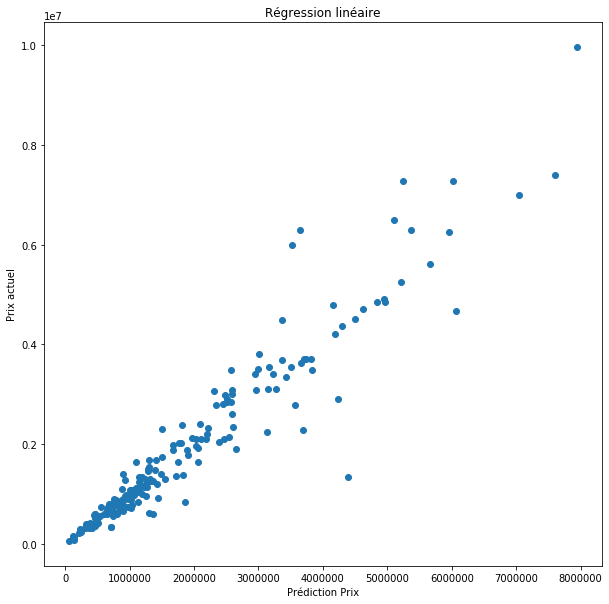

In [45]:
plt.scatter(predict_final, y_test, alpha=1)
plt.xlabel('Prédiction Prix')
plt.ylabel('Prix actuel')
plt.title('Régression linéaire')
plt.show()